In [39]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [11]:
# Generate cubic dataset with noise
X = 6 * np.random.rand(200, 1) - 3

In [12]:
y = 1.2 * X**3 - 3 * X**2 + 2 * X

In [13]:
X

array([[-0.24687012],
       [-0.78011645],
       [ 1.99173793],
       [ 0.72554783],
       [-1.24608198],
       [ 1.43047341],
       [-2.21465559],
       [ 0.09191954],
       [-0.96304043],
       [ 2.29059908],
       [-1.98538334],
       [-1.33172244],
       [-0.41419613],
       [-1.34123602],
       [-0.76357616],
       [ 2.71969027],
       [ 2.99206657],
       [ 1.77640191],
       [ 1.8058903 ],
       [-0.14265681],
       [-2.534029  ],
       [ 1.59211973],
       [-1.47993251],
       [ 2.84603208],
       [ 2.64493881],
       [-2.05634034],
       [ 1.2966026 ],
       [ 1.77127244],
       [ 1.42484469],
       [-2.58325776],
       [-2.53002455],
       [-0.96567903],
       [-0.03208166],
       [ 2.76476945],
       [-0.88465247],
       [-0.86878865],
       [-1.52911613],
       [-2.89936939],
       [-0.80834644],
       [-2.57472966],
       [-1.75767569],
       [ 1.03643318],
       [-1.76037425],
       [ 0.65711566],
       [-2.2047897 ],
       [-2

In [14]:
y

array([[-6.94629359e-01],
       [-3.95569540e+00],
       [ 1.56393293e+00],
       [ 3.30167865e-01],
       [-9.47210505e+00],
       [ 2.34718921e-01],
       [-3.21780734e+01],
       [ 1.59423447e-01],
       [-5.78022405e+00],
       [ 3.26276537e+00],
       [-2.51870623e+01],
       [-1.08180460e+01],
       [-1.42833817e+00],
       [-1.09745362e+01],
       [-3.81054032e+00],
       [ 7.38936422e+00],
       [ 1.12703821e+01],
       [ 8.12737199e-01],
       [ 8.95390812e-01],
       [-3.49850362e-01],
       [-4.38580886e+01],
       [ 4.22636285e-01],
       [-1.34200839e+01],
       [ 9.05545393e+00],
       [ 6.50661597e+00],
       [-2.72326574e+01],
       [ 1.65454482e-01],
       [ 7.98967759e-01],
       [ 2.30375730e-01],
       [-4.58725563e+01],
       [-4.36968199e+01],
       [-5.80960258e+00],
       [-6.72906391e-02],
       [ 7.95820026e+00],
       [-4.94794034e+00],
       [-4.78886587e+00],
       [-1.43632688e+01],
       [-6.02654792e+01],
       [-4.2

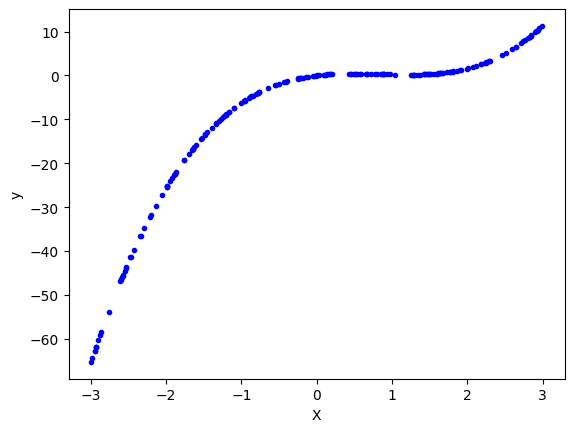

In [15]:
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [16]:
#Appyling train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.2)

In [19]:
lr=LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.7240312707642753

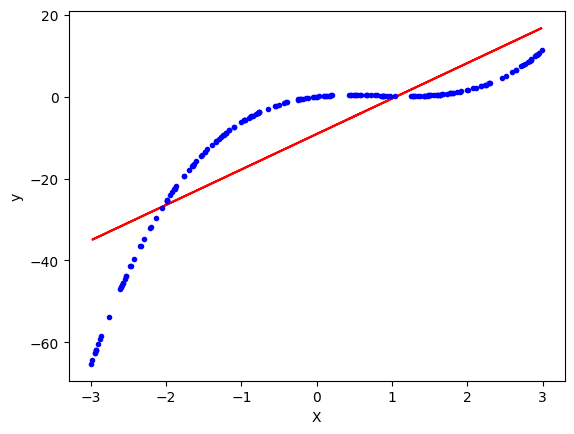

In [23]:
plt.plot(X_train,lr.predict(X_train),color="r")
plt.plot(X,y,"b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [24]:
#Applying polynomial linear regression
poly=PolynomialFeatures(degree=3,include_bias=True)
X_train_trans=poly.fit_transform(X_train)
X_test_trans=poly.transform(X_test)

In [25]:
print(X_train[0])
print(X_train_trans[0])

[0.43363013]
[1.         0.43363013 0.18803509 0.08153768]


In [26]:
lr=LinearRegression()
lr.fit(X_train_trans,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
y_pred=lr.predict(X_test_trans)

In [28]:
r2_score(y_test,y_pred)

1.0

In [29]:
print(lr.coef_)
print(lr.intercept_)

[[ 0.   2.  -3.   1.2]]
[-1.42108547e-14]


In [33]:
#Fit SGD Regressor (Gradient Descent)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

In [34]:
sgd = SGDRegressor(max_iter=1000, eta0=0.01, learning_rate='constant', random_state=42)
sgd.fit(X_train_scaled, y_train)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [35]:
#Predictions for plotting
X_new = np.linspace(-3, 3, 200).reshape(-1, 1)
X_new_poly = poly.transform(X_new)
X_new_scaled = scaler.transform(X_new_poly)
y_new = sgd.predict(X_new_scaled)

In [37]:
#Evaluate
y_pred = sgd.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
r2

0.9979303836538521

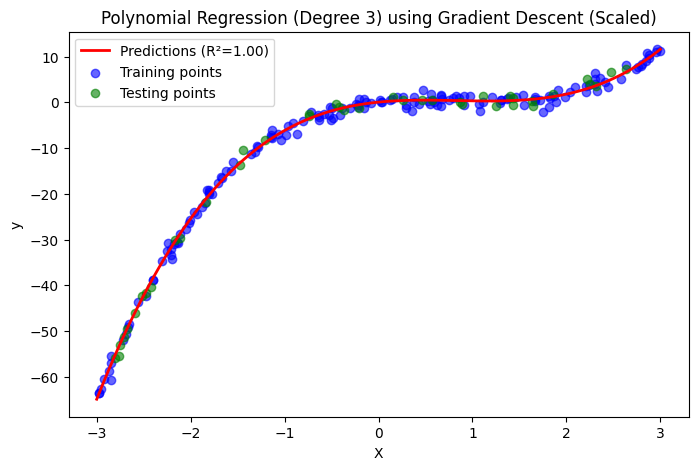

In [38]:
#Plotting the graph
plt.figure(figsize=(8,5))
plt.plot(X_new, y_new, "r-", linewidth=2, label=f"Predictions (R²={r2:.2f})")
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Training points')
plt.scatter(X_test, y_test, color='green', alpha=0.6, label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression (Degree 3) using Gradient Descent (Scaled)")
plt.legend()
plt.show()